In [10]:
import matplotlib.pyplot as plt
import numpy as np
import numpy_indexed as npi
from labellines import labelLines
import os
import sys


In [14]:
def get_stats(voltage, current):
    V = np.asarray(voltage)
    I = np.asarray(current)
    if V.shape != I.shape:
        raise ValueError("voltages and currents must have the same shape")

    # 1) Voc: interpolate V at I=0
    #    Sort by current for reliable interpolation
    sort_I = np.argsort(I)
    I_sorted = I[sort_I]
    V_sorted_by_I = V[sort_I]
    Voc = float(np.interp(0.0, I_sorted, V_sorted_by_I))

    # 2) Isc: interpolate I at V=0
    sort_V = np.argsort(V)
    V_sorted = V[sort_V]
    I_sorted_by_V = I[sort_V]
    Isc = float(np.interp(0.0, V_sorted, I_sorted_by_V))

    # 3) Maximum power point
    P = V * I
    idx_mp = np.argmax(P)
    Vmp = float(V[idx_mp])
    Imp = float(I[idx_mp])

    # 4) Fill Factor
    FF = (Vmp * Imp) / (Voc * Isc) if (Voc * Isc) != 0 else np.nan

    return FF, Isc, Voc

Pixel0 Reverse - Litos slope: 0.000021, CAS slope: -0.005385
Absolute Difference: 0.005406


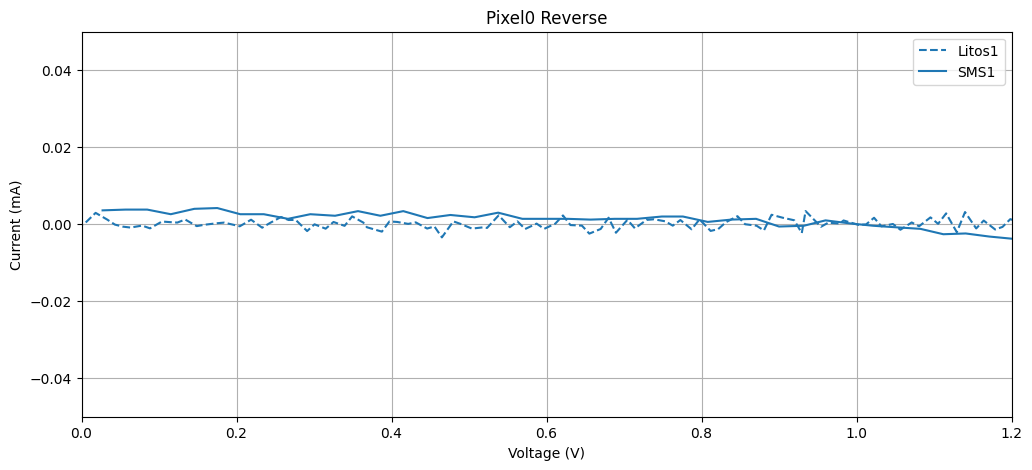

Pixel1 Forward - Litos slope: -0.000390, CAS slope: -0.005738
Absolute Difference: 0.005348


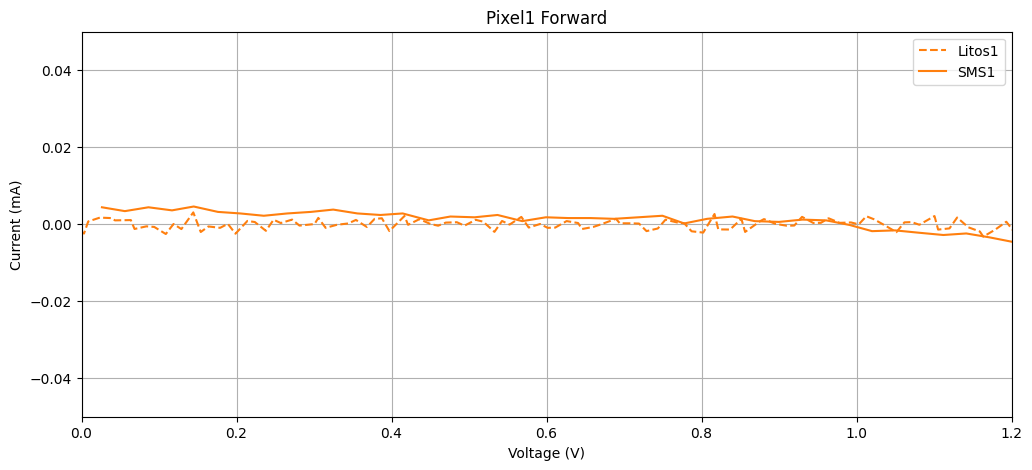

Pixel2 Reverse - Litos slope: -0.001220, CAS slope: -0.006551
Absolute Difference: 0.005332


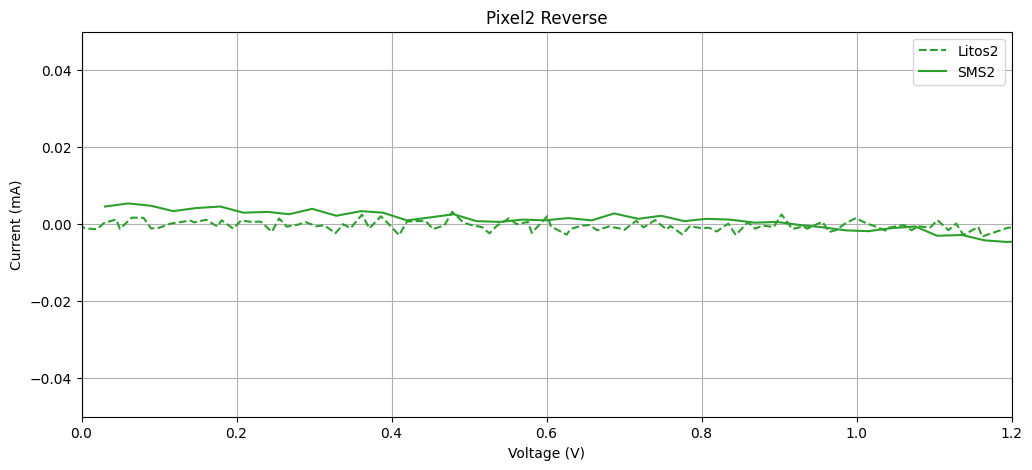

Pixel3 Forward - Litos slope: -0.001106, CAS slope: -0.006821
Absolute Difference: 0.005715


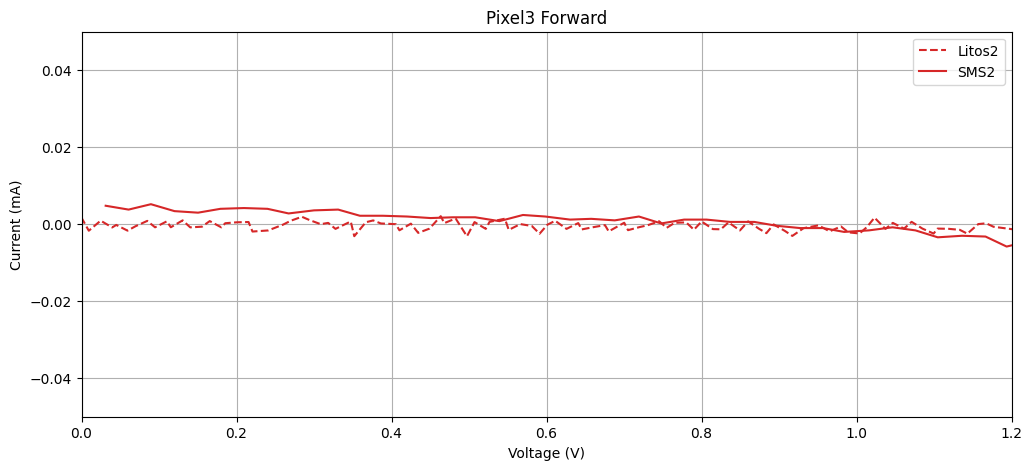

Pixel4 Reverse - Litos slope: -0.009969, CAS slope: -0.015974
Absolute Difference: 0.006004


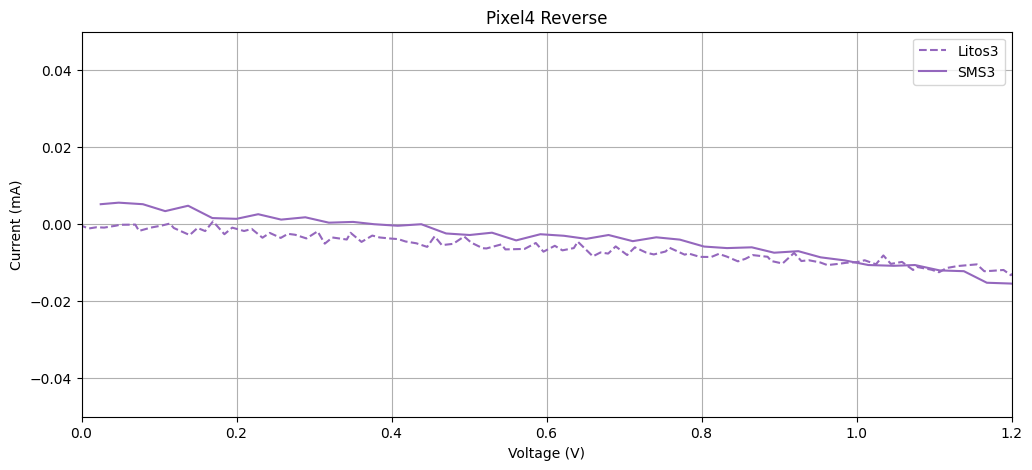

Pixel5 Forward - Litos slope: -0.009789, CAS slope: -0.015202
Absolute Difference: 0.005413


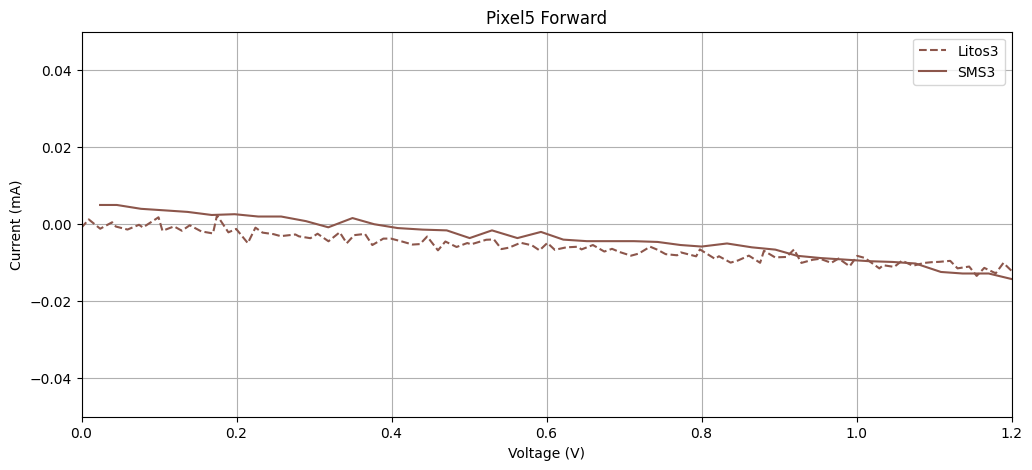

Pixel6 Reverse - Litos slope: -0.100130, CAS slope: -0.006040
Absolute Difference: 0.094089


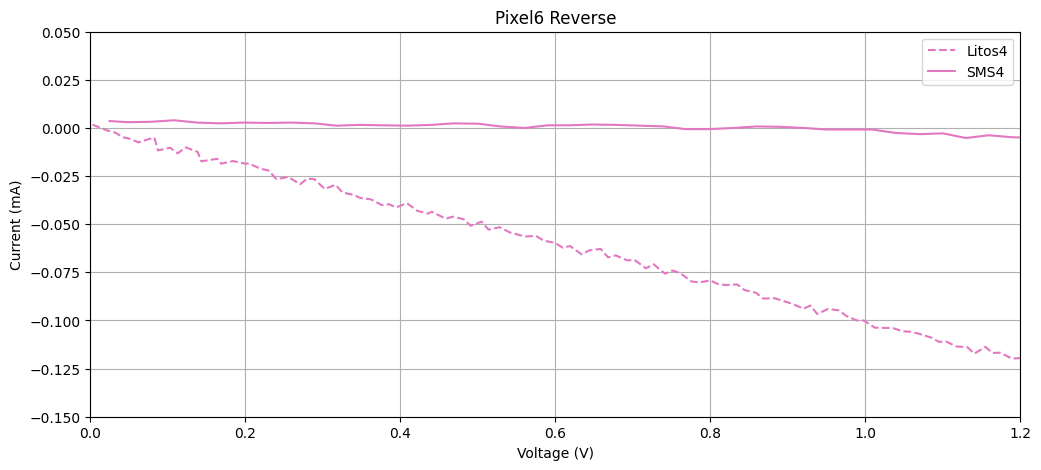

Pixel7 Forward - Litos slope: -0.100253, CAS slope: -0.006095
Absolute Difference: 0.094158


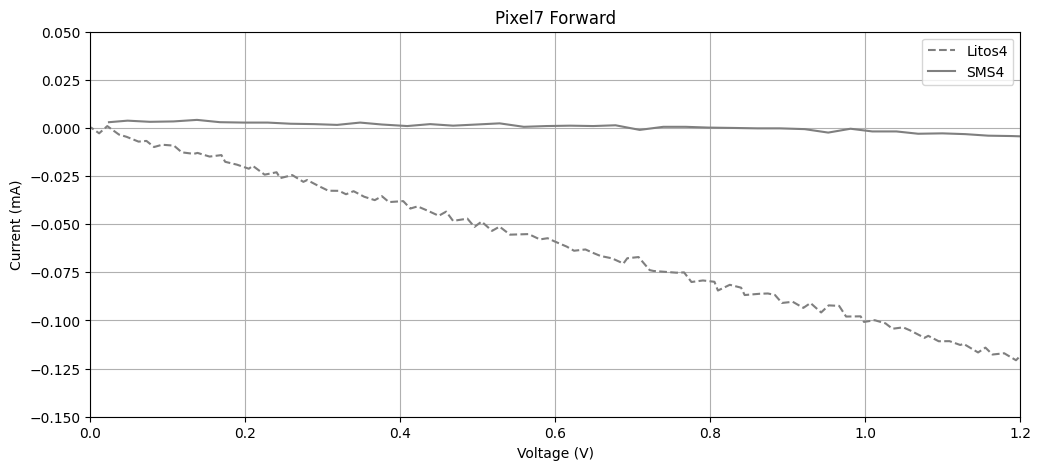

Pixel8 Reverse - Litos slope: -1.784249, CAS slope: -1.754801
Absolute Difference: 0.029449


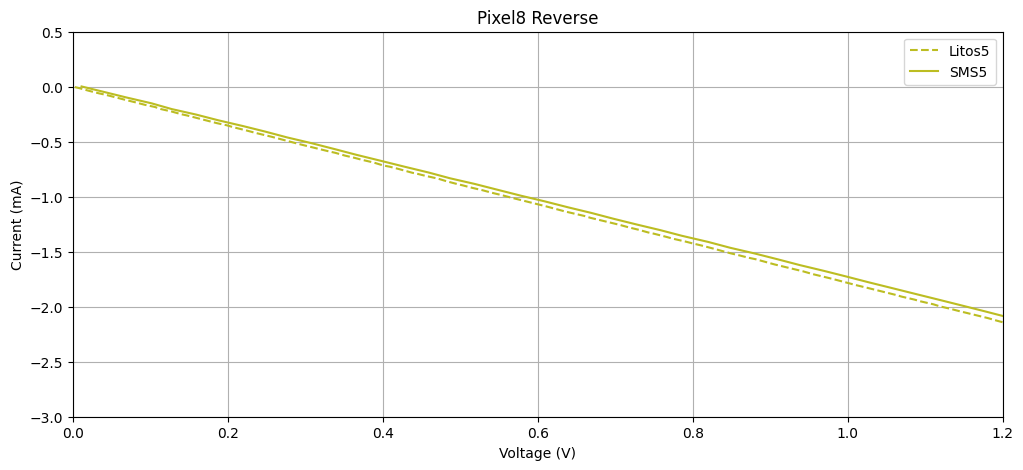

Pixel9 Forward - Litos slope: -1.784072, CAS slope: -1.754424
Absolute Difference: 0.029647


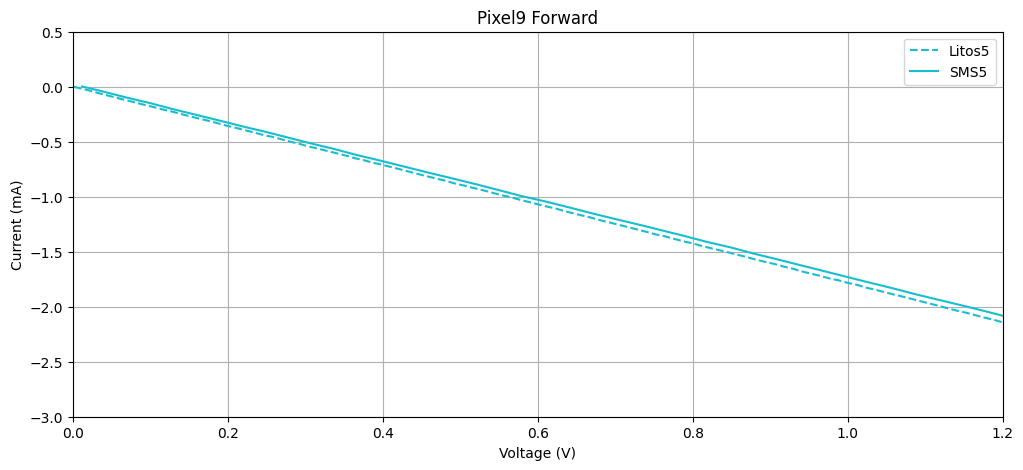

Pixel10 Reverse - Litos slope: -9.982206, CAS slope: -8.985282
Absolute Difference: 0.996925


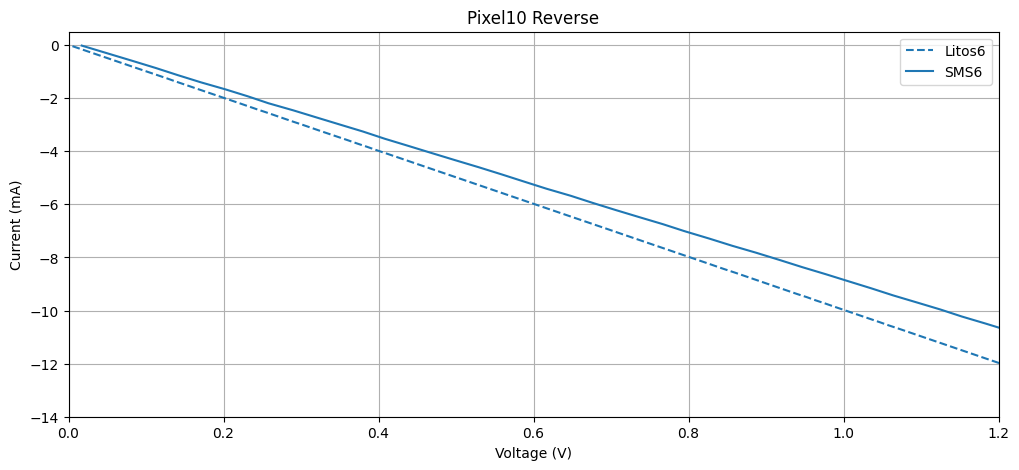

Pixel11 Forward - Litos slope: -9.980107, CAS slope: -8.975849
Absolute Difference: 1.004258


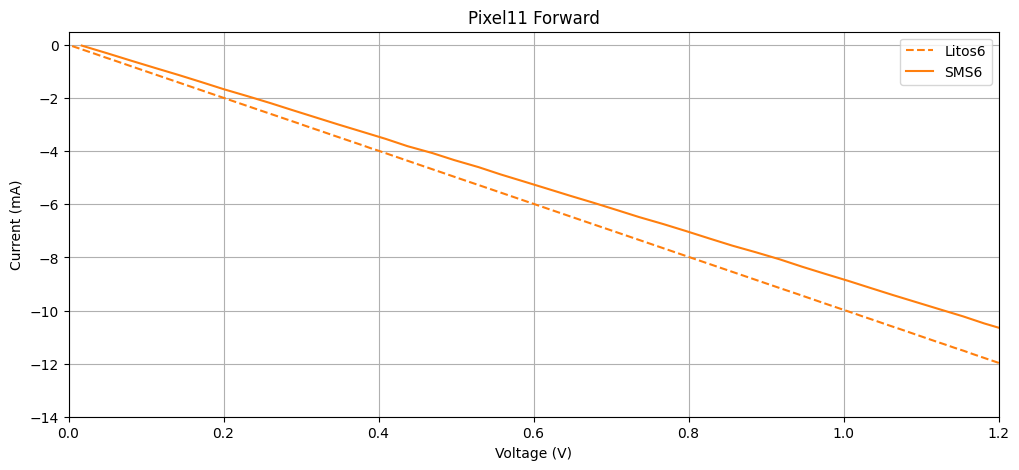

Pixel12 Reverse - Litos slope: -195.899128, CAS slope: -61.075887
Absolute Difference: 134.823242


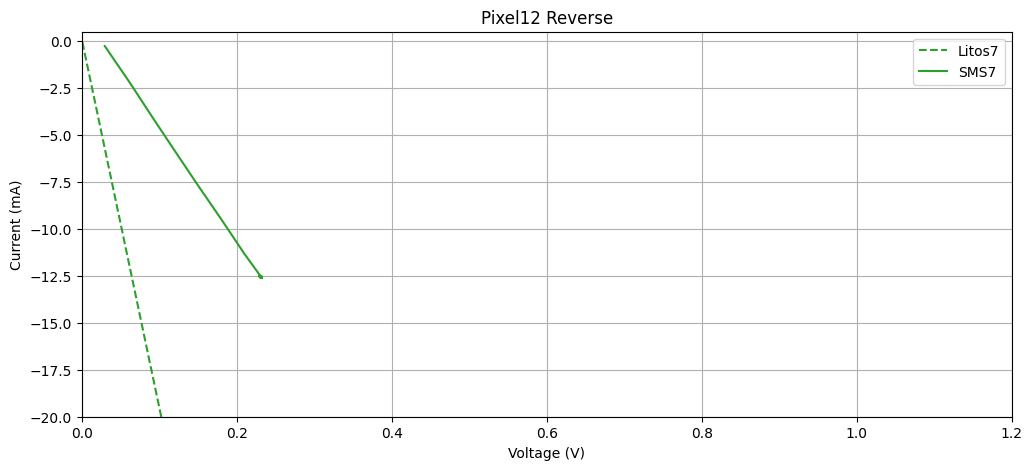

Pixel13 Forward - Litos slope: -195.869564, CAS slope: -61.265345
Absolute Difference: 134.604219


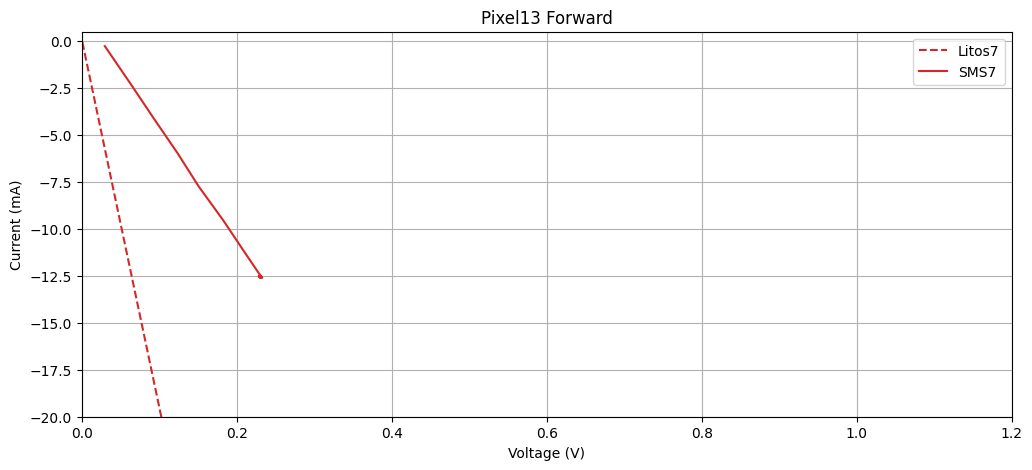

litos (0.5639850771410004, 2.2238543170678575, 0.5449100160921889)
cas (0.5258827480422139, 2.3538, 0.5509455589793955)
Differences - FF: 0.038102, Isc: 0.129946, Voc: 0.006036
Percent error ff 0.06755910864155837
Percent error isc 0.058432641893321244
Percent error voc 0.011076219392130665


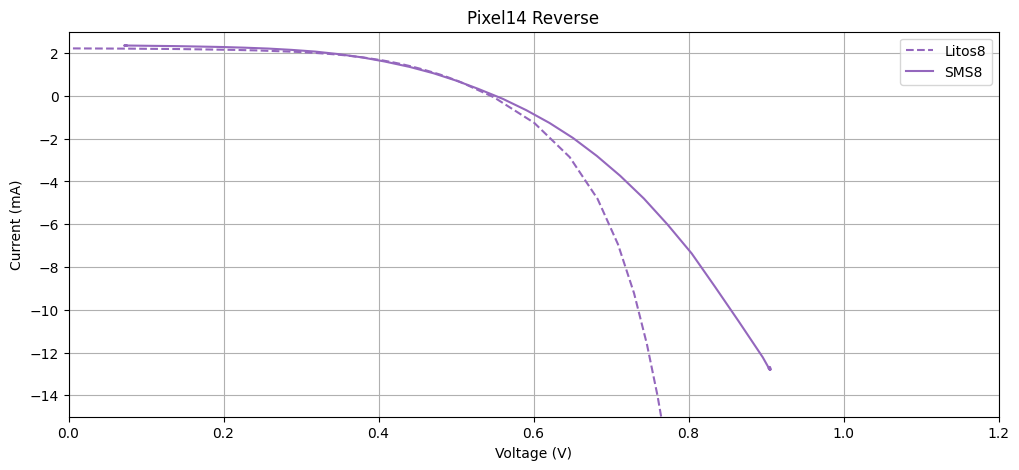

litos (0.5618304301860931, 2.2251570831574505, 0.5482123045509001)
cas (0.5299322601666748, 2.3508, 0.5572891628362407)
Differences - FF: 0.031898, Isc: 0.125643, Voc: 0.009077
Percent error ff0.05677544024956566
Percent error isc 0.05646474030690222
Percent error voc 0.016557195469693982


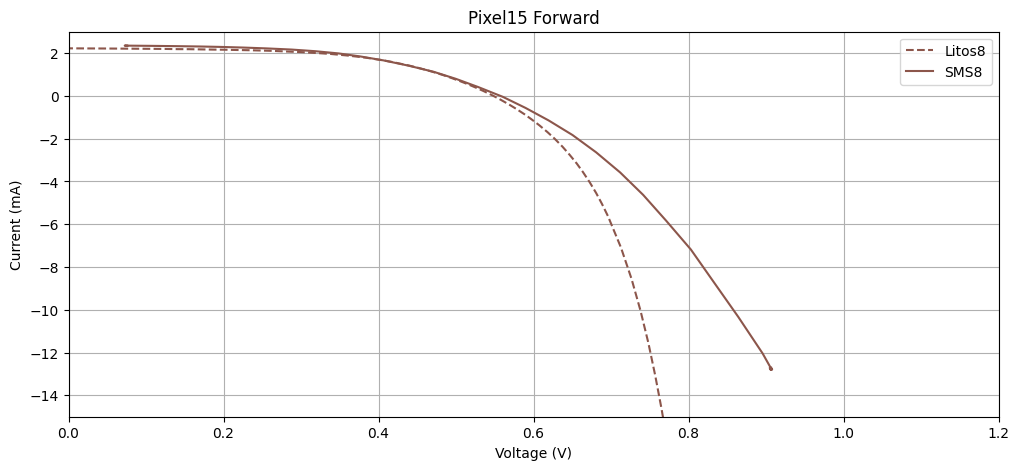

In [34]:


litos_diode = rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\_Old\photodiodetest\Litos_analyzed\100\Data\photo - 100p_1.0Sun_Scan0.txt"
sms_diode = rf"C:\Users\achen\Dropbox\code\Stability-Setup\data\Apr-30-2025 16_26_04 Diode Test\Apr-30-2025_16-26-10__ID1__light__scan.csv"
header = np.genfromtxt(
    litos_diode,
    delimiter=',',
    dtype=str,
    max_rows=1,
    encoding='cp1252'
)

litos_data = np.genfromtxt(
                    litos_diode,
                    delimiter=',',
                    comments='#',
                    skip_header=1,
                    encoding='cp1252'  # Specify the correct encoding
                )

arr = np.loadtxt(sms_diode, delimiter=",", dtype=str)
header_row = np.where(arr == "Time")[0][0]

litos_v = litos_data[:, ::2].astype(float)
litos_ma = litos_data[:, 1::2].astype(float)*0.128

meta_data = {}
for data in arr[:header_row, :2]:
    meta_data[data[0]] = data[1]

headers = arr[header_row, :]
arr = arr[header_row + 1 :, :]

data = arr[:, 2:-1]

sms_V = data[:, ::2].astype(float)
top_V, bottom_V = np.split(sms_V, 2, axis=0)   # two arrays

sms_mA = data[:, 1::2].astype(float)
top_ma, bottom_ma = np.split(sms_mA, 2, axis=0)   # two arrays

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


custom_ylimits = {
    # Add your custom limits here
    # Example: 0: {'top': 25, 'bottom': -35},
    # Example: 1: {'top': 15, 'bottom': -20},
    0: {'top': 0.05, 'bottom': -0.05},
    1: {'top': 0.05, 'bottom': -0.05},
    2: {'top': 0.05, 'bottom': -0.05},
    3: {'top': 0.05, 'bottom': -0.05},
    4: {'top': 0.05, 'bottom': -0.05},
    5: {'top': 0.05, 'bottom': -0.05},
    6: {'top': 0.05, 'bottom': -0.15},
    7: {'top': 0.05, 'bottom': -0.15},
    8: {'top': 0.5, 'bottom': -3},
    9: {'top': 0.5, 'bottom': -3},
    10: {'top': 0.5, 'bottom': -14},
    11: {'top': 0.5, 'bottom': -14},
    12: {'top': 0.5, 'bottom': -20},
    13: {'top': 0.5, 'bottom': -20},
    14: {'top': 3, 'bottom': -15},
    15: {'top': 3, 'bottom': -15},
}

# Helper function to set limits for multiple plots at once
def set_limits_for_plots(plot_indices, top=None, bottom=None):
    """Set y-limits for multiple plots at once

    Args:
        plot_indices: list of plot indices (0-15)
        top: top y-limit (optional)
        bottom: bottom y-limit (optional)
    """
    for i in plot_indices:
        if i not in custom_ylimits:
            custom_ylimits[i] = {}
        if top is not None:
            custom_ylimits[i]['top'] = top
        if bottom is not None:
            custom_ylimits[i]['bottom'] = bottom

# Example usage of helper function:
# set_limits_for_plots([0, 2, 4, 6, 8, 10, 12, 14], top=25, bottom=-35)  # Reverse plots
# set_limits_for_plots([1, 3, 5, 7, 9, 11, 13, 15], top=20, bottom=-30)  # Forward plots
# set_limits_for_plots([0, 1], top=30)  # Set only top limit for plots 0 and 1


for i in range(16):
    plt.figure(figsize=(12,5))
    plt.xlim(0,1.2)

    # Check if custom limits are defined for this plot
    if i in custom_ylimits:
        top = custom_ylimits[i].get('top')
        bottom = custom_ylimits[i].get('bottom')
    else:
        # Use original logic as fallback
        # top = np.max(litos_ma[:,i])*1.25

        top = np.max(litos_ma[:,i])*1.25
        bottom = np.min(litos_ma[:,i])*0.95

    plt.ylim(bottom = bottom, top = top)
    plt.xlabel('Voltage (V)')
    plt.ylabel('Current (mA)')
    plt.grid()
    ax = plt.gca()
    lineName = "CAS"
    plt.plot(litos_v[:,i],
                litos_ma[:,i],
                linestyle='--',
                color=colors[i % len(colors)],
                label = f"Litos{i//2+1}")
    if i%2 == 0:
        plt.title(f"Pixel{i} Reverse")
        plt.plot(bottom_V[:,i//2],
                    bottom_ma[:,i//2],
                    color=colors[i % len(colors)],
                    label = f"SMS{i//2+1}")
    else:
        plt.plot(top_V[:,i//2],
                    top_ma[:,i//2],
                    color=colors[i% len(colors)],
                    label = f"SMS{i//2+1}")
        plt.title(f"Pixel{i} Forward")
    if i == 14:
        litos_stats = get_stats(litos_v[:,i], litos_ma[:,i])
        sms_stats = get_stats(bottom_V[:,i//2], bottom_ma[:,i//2])
        print(f"litos {litos_stats}")
        print(f"cas {sms_stats}")
        # Calculate absolute differences (FF, Isc, Voc)
        ff_diff = abs(litos_stats[0] - sms_stats[0])
        isc_diff = abs(litos_stats[1] - sms_stats[1])
        voc_diff = abs(litos_stats[2] - sms_stats[2])
        print(f"Differences - FF: {ff_diff:.6f}, Isc: {isc_diff:.6f}, Voc: {voc_diff:.6f}")
        print(f"Percent error ff {ff_diff/litos_stats[0]}")
        print(f"Percent error isc {isc_diff/litos_stats[1]}")
        print(f"Percent error voc {voc_diff/litos_stats[2]}")
    elif i == 15:
        litos_stats = get_stats(litos_v[:,i], litos_ma[:,i])
        sms_stats = get_stats(top_V[:,i//2], top_ma[:,i//2])
        print(f"litos {litos_stats}")
        print(f"cas {sms_stats}")
        # Calculate absolute differences (FF, Isc, Voc)
        ff_diff = abs(litos_stats[0] - sms_stats[0])
        isc_diff = abs(litos_stats[1] - sms_stats[1])
        voc_diff = abs(litos_stats[2] - sms_stats[2])
        print(f"Differences - FF: {ff_diff:.6f}, Isc: {isc_diff:.6f}, Voc: {voc_diff:.6f}")
        print(f"Percent error ff{ff_diff/litos_stats[0]}")
        print(f"Percent error isc {isc_diff/litos_stats[1]}")
        print(f"Percent error voc {voc_diff/litos_stats[2]}")

    else:
        # Calculate and compare average slopes between litos and cas
        if i % 2 == 0:  # Even indices (reverse bias)
            # Calculate slope for litos
            litos_slope = np.polyfit(litos_v[:,i], litos_ma[:,i], 1)[0]
            # Calculate slope for cas (bottom)
            cas_slope = np.polyfit(bottom_V[:,i//2], bottom_ma[:,i//2], 1)[0]
            print(f"Pixel{i} Reverse - Litos slope: {litos_slope:.6f}, CAS slope: {cas_slope:.6f}")
            print(f"Absolute Difference: {abs(litos_slope - cas_slope):.6f}")
        else:  # Odd indices (forward bias)
            # Calculate slope for litos
            litos_slope = np.polyfit(litos_v[:,i], litos_ma[:,i], 1)[0]
            # Calculate slope for cas (top)
            cas_slope = np.polyfit(top_V[:,i//2], top_ma[:,i//2], 1)[0]
            print(f"Pixel{i} Forward - Litos slope: {litos_slope:.6f}, CAS slope: {cas_slope:.6f}")
            print(f"Absolute Difference: {abs(litos_slope - cas_slope):.6f}")


    # plt.legend(bbox_to_anchor=(0.25, 0.16))
    plt.legend()
    plt.show()